# Map Drawing and Geolocation Plotting 
# CS 109A/AC 209A/STAT 121A Data Science: Lab 5 (Solutions)
**Harvard University**<br>
**Fall 2016**<br>
**Instructors: W. Pan, P. Protopapas, K. Rader**<br>

In [18]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# Import the basemap package
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon

## How to Plot Data on Maps

This a data visualization exercise that is designed to show you how to draw maps with regional details in `python`.  

Your goal is to extract the longitude, latitude information from a data set and visualize the data as points on a map with regional details.

1. Load `WIC.csv`, this is a data set describing authorized WIC service providers. Examine your data.

2. Clean the data set. Form an array of logitudes from the location information, do the same for latitudes. (Use only `.apply` to do the extraction)

3. Create a map of California using `Basemap`. You can follow the basic tutorial [here](https://www.getdatajoy.com/examples/python-plots/plot-data-points-on-a-map). **Hint:** You need to get the longitude, latitude values of a bounding box around the state  of California, use Google Map to get these values of the corners of your box.

4. The map you produce from step 3 will be crude. You can add some regional information, like county lines, to your map by plotting "shape data". Do this by reading the shape file contained in `California_County`:
```
my_map.readshapefile('./California_County/CaliforniaCounty', ...)
```

5. Plot the `WIC` data points on the final map of California with county lines. 

In [19]:
df = pd.read_csv('WIC.csv')
df.head()

,Vendor,Address,Second Address,City,Zip Code,County,Location
0,STATER BROS. #038,E 1230 MCFADDEN AVE,NaN,SANTA ANA,92705,ORANGE,"(33.732219, -117.85598)"
1,STATER BROS. #186,2687 GATEWAY RD,NaN,CARLSBAD,92009,SAN DIEGO,"(33.126631, -117.2519)"
2,STATER BROS. #172,25900 IRIS AVE,NaN,MORENO VALLEY,92551,RIVERSIDE,"(33.89137, -117.20858)"
3,STATER BROS. #124,24336 EL TORO RD,NaN,LAGUNA HILLS,92653,ORANGE,"(33.608268, -117.73128)"
4,STATER BROS. #033,2603 WESTMINSTER AVE,NaN,SANTA ANA,92706,ORANGE,"(33.760486, -117.90469)"


In [20]:
type(df['Location'].iloc[0])

str

In [21]:
df = df.dropna()
geolocation = df['Location'].apply(lambda s: s.replace('(', '').replace(')', '').split(','))
geolocation = geolocation.apply(lambda l: [float(item) for item in l])
geolocation.iloc[0]

[33.86735, -117.93348]

In [22]:
latitude = geolocation.apply(lambda t: t[0]).values
latitude[:5]

array([ 33.86735 ,  34.168135,  34.130469,  34.061408,  35.262871])

In [23]:
longitude = geolocation.apply(lambda t: t[1]).values
longitude[:5]

array([-117.93348, -117.31476, -117.31837, -117.72072, -118.91482])

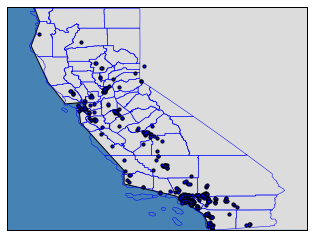

In [24]:
# Create a map on which to draw
m = Basemap(projection='gall',
            resolution = 'c',
            llcrnrlon=-125.384752, llcrnrlat=32.561167,
            urcrnrlon=-113.211901, urcrnrlat=42.078247)

# Draw coastlines, and the edges of the map.
m.drawcoastlines()
m.fillcontinents(color='gainsboro', zorder=0)
m.drawmapboundary(fill_color='steelblue', zorder=1)

m.readshapefile('./California_County/CaliforniaCounty', 
                name='California_County', 
                drawbounds=True, 
                color='blue', zorder=2)


# Use matplotlib to draw the points onto the map.
x, y = m(longitude, latitude)
m.scatter(x, y, s=10, zorder=3)

# Show the plot.
plt.show()